In [109]:
# Importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [67]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [74]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


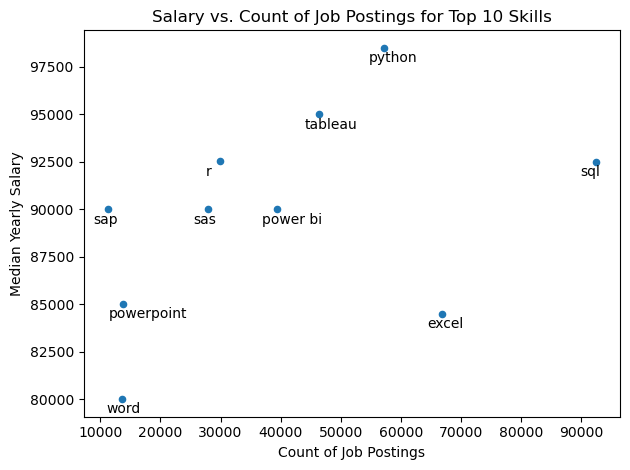

In [107]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i]-2500, skill_stats['median_salary'].iloc[i]-750, txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

# Problems

In [113]:
# Median Yearly Salary vs. Job Count
jobs_data = df.groupby('job_title_short').agg(
    median_salary=('salary_year_avg', 'median'),
    job_count=('job_title_short', 'count')
)

jobs_data = jobs_data.sort_values(by='job_count', ascending=False)

jobs_data

,median_salary,job_count
job_title_short,,
Data Analyst,90000.0,196075
Data Engineer,125000.0,186241
Data Scientist,127500.0,172286
Business Analyst,85000.0,49063
Software Engineer,99150.0,44929
Senior Data Engineer,147500.0,44563
Senior Data Scientist,155500.0,36957
Senior Data Analyst,111175.0,29216
Machine Learning Engineer,106415.0,14080


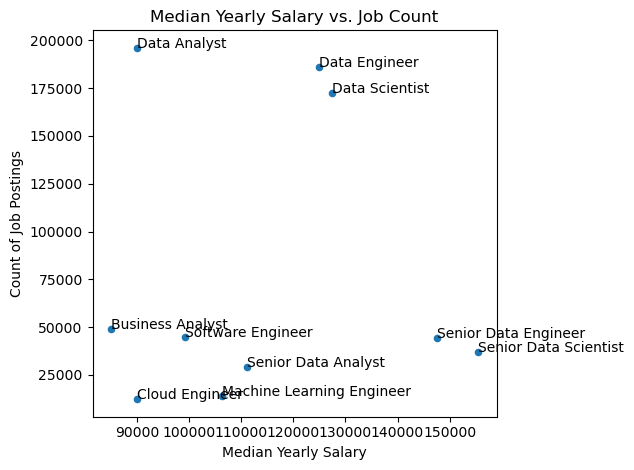

In [118]:
jobs_data.plot(kind='scatter', x='median_salary',y='job_count')

for i, txt in enumerate(jobs_data.index):
    plt.text(jobs_data['median_salary'].iloc[i], jobs_data['job_count'].iloc[i], txt)

plt.ylabel('Count of Job Postings')
plt.xlabel('Median Yearly Salary')
plt.title('Median Yearly Salary vs. Job Count')
plt.tight_layout()
plt.show()

In [122]:
# Top 7 countries by Median Yearly Salary vs Job Count
countries = df.groupby('job_country').agg(
    median_salary=('salary_year_avg', 'median'),
    jobs_count=('job_title_short', 'count')
)

countries = countries.sort_values(by='jobs_count', ascending=False).head(7)

countries

,median_salary,jobs_count
job_country,,
United States,119187.5,206292
India,111175.0,51088
United Kingdom,104668.0,40375
France,97444.0,39922
Germany,111175.0,27694
Spain,98391.5,25100
Singapore,100500.0,23696


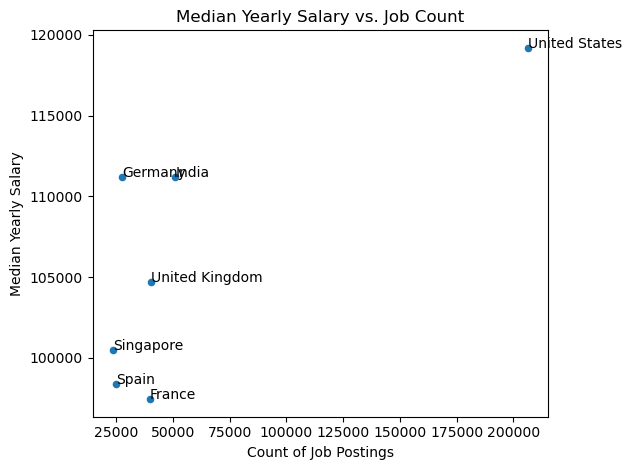

In [123]:
countries.plot(kind='scatter', x='jobs_count',y='median_salary')

for i, txt in enumerate(countries.index):
    plt.text(countries['jobs_count'].iloc[i], countries['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Median Yearly Salary vs. Job Count')
plt.tight_layout()
plt.show()

In [ ]:
# Average Yearly Salary vs Job Count for Top Roles by Schedule Type
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_filtered = df[df['job_title_short'].isin(target_job_titles)]

df_filtered['job_title_short'].unique()

array(['Data Analyst', 'Data Engineer', 'Data Scientist'], dtype=object)

In [131]:
df_grouped = df_filtered.groupby(['job_title_short', 'job_schedule_type']).agg(
    avg_salary=('salary_year_avg', 'mean'),
    job_count=('job_title_short', 'count')
).reset_index()

df_grouped

,job_title_short,job_schedule_type,avg_salary,job_count
0,Data Analyst,Contractor,85289.169502,10009
1,Data Analyst,Contractor and Full-time,NaN,1
2,Data Analyst,Contractor and Internship,NaN,8
3,Data Analyst,Contractor and Per diem,NaN,2
4,Data Analyst,Contractor and Temp work,78750.000000,549
...,...,...,...,...
103,Data Scientist,Pekerjaan tetap,NaN,3
104,Data Scientist,Per diem,NaN,3
105,Data Scientist,Temp work,83333.333333,439
106,Data Scientist,Temp work and Internship,NaN,82


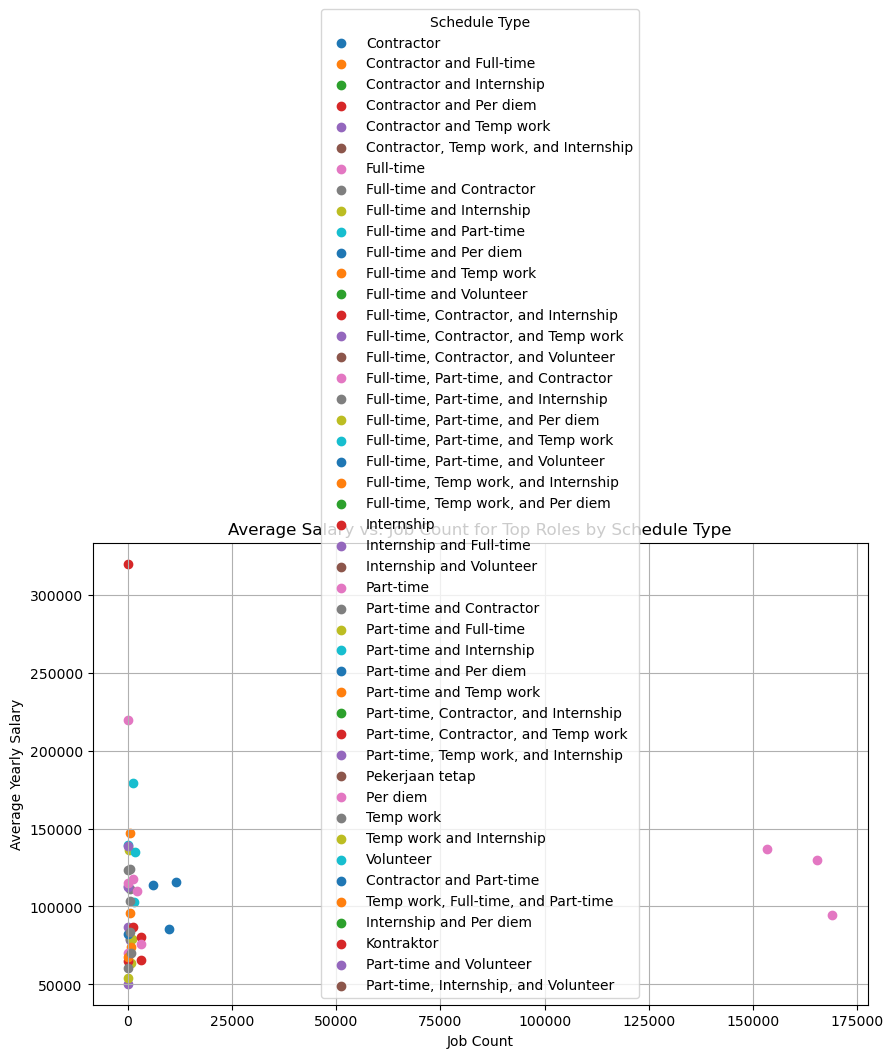

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each job schedule type with a different colo
for schedule_type in df_grouped['job_schedule_type'].unique():
    data = df_grouped[df_grouped['job_schedule_type'] == schedule_type]
    plt.scatter(data['job_count'], data['avg_salary'], label=schedule_type)

plt.xlabel('Job Count')
plt.ylabel('Average Yearly Salary')
plt.title('Average Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend(title='Schedule Type')
plt.grid(True)

plt.show()